Import everything we need

In [1]:
import sys
import os.path as op
module_path = op.abspath(op.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
from scipy.io import savemat, loadmat

from data_analysis.functions_connectivity import \
    plot_connectivity_matrix
from data_analysis.functions_graph_theory import \
    multi_small_world, epochs_swi, core_swi

subject_dir = "/net/store/nbp/projects/hyperscanning/hyperscanning-2.0/mne_data/sourcedata/"
behav_dir = "/net/store/nbp/projects/hyperscanning/study_project/NBP_Hyperscanning/data_analysis/Behavioural_Analysis/BehaviouralData"
result_dir = "/net/store/nbp/projects/hyperscanning/study_project/results"


Bad key "text.kerning_factor" on line 4 in
/net/store/nbp/projects/hyperscanning/study_project/programming_tools/miniconda3/envs/hyperscanning/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


Define which pair/condition to load and load the data

In [2]:
# define which ISPCS to calculate
#['202','203','204','205','206','207','208','209','211','212']
subj_pair = '206'

# conditions ["early", "late"]
condition = "early"

# number of cores to use for parallel processing (ramsauer pc should have 80 cores)
n_jobs = 1

ispc_matrix = loadmat(op.join(result_dir, "ispc_matrices", subj_pair + "_" + condition + ".mat"))[condition]

Try out to calculate the SWI by hand (these are the same steps as in the core_swi function)

In [34]:
import networkx as nx

nrand=5
# create an graph from the matrix
graph = nx.convert_matrix.from_numpy_array(ispc_matrix[0,:,:,0])

# create a container for the later small world references
small_worlds = []
for i in range(nrand):
    rand_ref = nx.random_reference(graph, connectivity=True, seed=None)
    latt_ref= nx.lattice_reference(graph, niter=1,D=None, connectivity=True, seed=None)

    # create all metrics: CPL&CC for observed/random/lattice
    CPL = nx.average_shortest_path_length(graph, weight='weight', method=None)
    CPL_R = nx.average_shortest_path_length(rand_ref, weight='weight', method=None)
    CPL_L = nx.average_shortest_path_length(latt_ref, weight='weight', method=None)
    CC = nx.average_clustering(graph, weight='weight')
    CC_R = nx.average_clustering(rand_ref, weight='weight')
    CC_L = nx.average_clustering(latt_ref, weight='weight')

    # calculate SWI
    SWI = ( (CPL - CPL_L) / (CPL_R - CPL_L) )   *   ( (CC - CC_R) / (CC_L - CC_R) )
    small_worlds.append(SWI)

ZeroDivisionError: float division by zero

In [38]:
CPL_R - CPL_L

0.0

In [4]:
epochs_swi(ispc_matrix[:2,:,:,:2])

2020-10-29 15:51:49,822 Progress: 0.0 %


Progress: 0.0 %


ZeroDivisionError: float division by zero

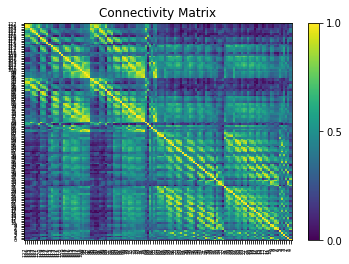

In [14]:
plot_connectivity_matrix(ispc_matrix[0,:,:,0], [i for i in range(128)])

In [8]:
import h5py
import os.path as op
from scipy.io import loadmat
result_dir = "/net/store/nbp/projects/hyperscanning/study_project/results"
subj_pair="202"
condition="early"
phase_angles = h5py.File(op.join(result_dir, "phase_angles", subj_pair + "_" + condition + ".hdf5"), "r")[condition]
times = loadmat(op.join(result_dir, "phase_angles", subj_pair + "_times.mat"))["times"]
phase_angles.shape

(208, 128, 20, 1537)